In [1]:
import numpy as np
from numpy import *
import scipy as sc
import scipy.optimize as opt
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.random import randint
import math
from scipy.optimize import minimize as mini
from scipy.optimize import least_squares as ls
from scipy.optimize import leastsq
import gc
from multiprocessing import Process
#import colorednoise as cn
from numpy import concatenate, real, std, abs, min
from numpy.fft import ifft, fftfreq
from numpy.random import normal
from matplotlib import mlab
from matplotlib import pylab

In [2]:

def powerlaw_psd_gaussian(exponent, samples, fmin=0):
    # frequencies (we asume a sample rate of one)
    f = fftfreq(samples)

    # scaling factor for all frequencies
    ## though the fft for real signals is symmetric,
    ## the array with the results is not - take neg. half!
    s_scale = abs(concatenate([f[f<0], [f[-1]]]))
    ## low frequency cutoff?!?
    if fmin:
        ix = sum(s_scale>fmin)
        if ix < len(f):
            s_scale[ix:] = s_scale[ix]
    s_scale = s_scale**(-exponent/2.)

    # scale random power + phase
    sr = s_scale * normal(size=len(s_scale))
    si = s_scale * normal(size=len(s_scale))
    if not (samples % 2): si[0] = si[0].real

    s = sr + 1J * si
    # this is complicated... because for odd sample numbers,ss
    ## there is one less positive freq than for even sample numbers
    s = concatenate([s[1-(samples % 2):][::-1], s[:-1].conj()])

    # time series
    y = s #ifft(s).real

    y1 = y #/ std(y)
    #print y1

    y1 = y1

    y2 = ifft(y1)

    ret = y1

    print 'HEY', ret
    #print 'HEY HO'

    return ret

In [3]:
x_list = np.arange(0,2000,1)
print x_list
x = powerlaw_psd_gaussian(3, 2000)
y = powerlaw_psd_gaussian(2, 2000)
z = np.exp(0.9*np.log(x) + 0.1*np.log(y))
z1 = np.exp(0.9*np.log(x) + 0.1*np.log(y))
for i in range(10):
    z1 = np.exp(0.9*np.log(z1) + 0.1*np.log(y))

x_small = x*10**(-18)
y_small = y*10**(-18)
z_small = z*10**(-18)
z1_small = z_small
for i in range(10):
    z1_small = np.exp(0.9*np.log(z1_small) + 0.1*np.log(y_small))

[   0    1    2 ... 1997 1998 1999]
HEY [-15222.53748089-13699.27376647j 124947.98322399 -1567.84994929j
    663.40625675+14579.30591712j ...  12538.77314427 -3220.34947357j
    663.40625675-14579.30591712j 124947.98322399 +1567.84994929j]
HEY [ 4103.06148584-2833.12384262j -1882.44667418 -207.89213901j
   135.30657276 +599.15137029j ...   -80.52088199 -184.66647318j
   135.30657276 -599.15137029j -1882.44667418 +207.89213901j]


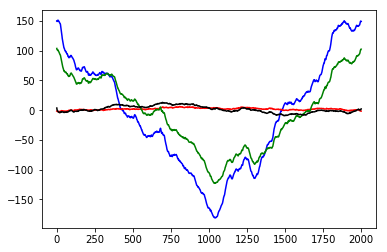

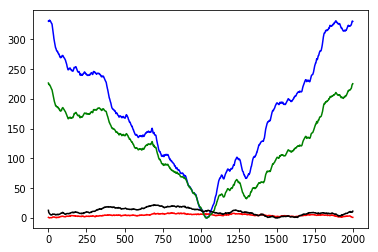

In [4]:
x_new = ifft(x).real - np.min(ifft(x).real)
y_new = ifft(y).real - np.min(ifft(y).real)
z_new = ifft(z).real - np.min(ifft(z).real)
z1_new = ifft(z1).real - np.min(ifft(z1).real)

plt.figure()
plt.plot(x_list,ifft(x).real,color='b')
plt.plot(x_list,ifft(y).real,color='r')
plt.plot(x_list,ifft(z).real,color='g')
plt.plot(x_list,ifft(z1).real,color='black')
plt.show()

plt.figure()
plt.plot(x_list,x_new,color='b')
plt.plot(x_list,y_new,color='r')
plt.plot(x_list,z_new,color='g')
plt.plot(x_list,z1_new,color='black')
plt.show()

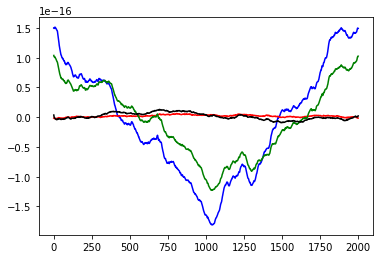

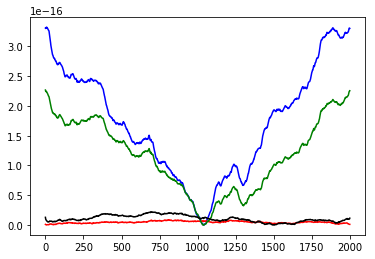

In [5]:
x_small_new = ifft(x_small).real - np.min(ifft(x_small).real)
y_small_new = ifft(y_small).real - np.min(ifft(y_small).real)
z_small_new = ifft(z_small).real - np.min(ifft(z_small).real)
z1_small_new = ifft(z1_small).real - np.min(ifft(z1_small).real)

plt.figure()
plt.plot(x_list,ifft(x_small).real,color='b')
plt.plot(x_list,ifft(y_small).real,color='r')
plt.plot(x_list,ifft(z_small).real,color='g')
plt.plot(x_list,ifft(z1_small).real,color='black')
plt.show()

plt.figure()
plt.plot(x_list,x_small_new,color='b')
plt.plot(x_list,y_small_new,color='r')
plt.plot(x_list,z_small_new,color='g')
plt.plot(x_list,z1_small_new,color='black')
plt.show()

In [6]:
s_x, f_x = mlab.psd(ifft(x).real)
s_y, f_y = mlab.psd(ifft(y).real)
s_z, f_z = mlab.psd(ifft(z).real)
s_z1, f_z1 = mlab.psd(ifft(z1).real)

s_xn, f_xn = mlab.psd(x_new)
s_yn, f_yn = mlab.psd(y_new)
s_zn, f_zn = mlab.psd(z_new)

s_x_small, f_x_small = mlab.psd(ifft(x_small).real)
s_y_small, f_y_small = mlab.psd(ifft(y_small).real)
s_z_small, f_z_small = mlab.psd(ifft(z_small).real)

s_xn_small, f_xn_small = mlab.psd(x_small_new)
s_yn_small, f_yn_small = mlab.psd(y_small_new)
s_zn_small, f_zn_small = mlab.psd(z_small_new)

#print s_xn, f_xn
#print s_x, f_x

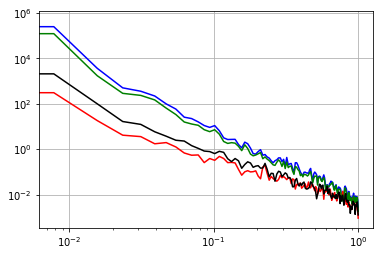

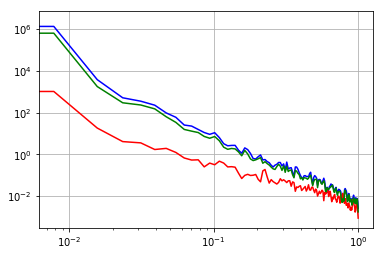

In [7]:
pylab.loglog(f_x,s_x,color='b')
pylab.loglog(f_y,s_y,color='r')
pylab.loglog(f_z,s_z,color='g')
pylab.loglog(f_z1,s_z1,color='black')
pylab.grid(True)
pylab.show()

pylab.loglog(f_xn,s_xn,color='b')
pylab.loglog(f_yn,s_yn,color='r')
pylab.loglog(f_zn,s_zn,color='g')
pylab.grid(True)
pylab.show()

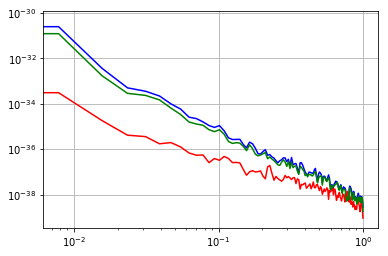

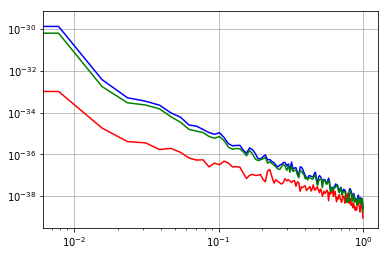

In [8]:
pylab.loglog(f_x_small,s_x_small,color='b')
pylab.loglog(f_y_small,s_y_small,color='r')
pylab.loglog(f_z_small,s_z_small,color='g')
pylab.grid(True)
pylab.show()

pylab.loglog(f_xn_small,s_xn_small,color='b')
pylab.loglog(f_yn_small,s_yn_small,color='r')
pylab.loglog(f_zn_small,s_zn_small,color='g')
pylab.grid(True)
pylab.show()

[2.64028025 2.97803433 2.95134891 ... 2.73890672 2.64794318 2.72519015]


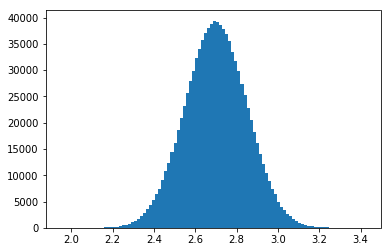

In [9]:
norm = np.random.normal(2.7,0.15,1000000)
print norm 
plt.hist(norm,bins=100)
plt.show()